# Image classification training with image format


## Introduction

This is the first attempt at classification of satellite images. Here we will use amazon data which is already downloaded.

1. [Introduction](#Introduction)
2. [Prerequisites and Preprocessing](#Prequisites-and-Preprocessing)
  1. [Permissions and environment variables](#Permissions-and-environment-variables)
  2. [Prepare the data](#Prepare-the-data)
3. [Fine-tuning The Image Classification Model](#Fine-tuning-the-Image-classification-model)
  1. [Training parameters](#Training-parameters)
  2. [Training](#Training)
4. [Deploy The Model](#Deploy-the-model)
  1. [Create model](#Create-model)
  2. [Batch transform](#Batch-transform)
  3. [Realtime inference](#Realtime-inference)
    1. [Create endpoint configuration](#Create-endpoint-configuration) 
    2. [Create endpoint](#Create-endpoint) 
    3. [Perform inference](#Perform-inference) 
    4. [Clean up](#Clean-up)


Things to do:
- In the training folder, will need to seperate which ones are 1 and which are 0.
- Need to prepare lst file: image index, the second column specifies the class label index for the image, and the third column specifies the relative path of the image file
- Image shape

In [13]:
# Code to Split Train Images by Label

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import boto3
from s3fs.core import S3FileSystem
import os
import awscli
from awscli.clidriver import create_clidriver

In [37]:
bucket='w210-water-detection-data'
key = 'amazon/train_v2.csv'

s3 = S3FileSystem(anon=False)

df = pd.read_csv(s3.open('{}/{}'.format(bucket, key), mode='rb'))
print(df.head)


<bound method NDFrame.head of         image_name  water
0          train_0      0
1          train_1      1
2         train_10      1
3        train_100      1
4       train_1000      0
5      train_10000      0
6      train_10001      0
7      train_10002      0
8      train_10003      0
9      train_10004      0
10     train_10005      0
11     train_10006      0
12     train_10007      0
13     train_10008      1
14     train_10009      0
15      train_1001      0
16     train_10010      1
17     train_10011      0
18     train_10012      1
19     train_10013      0
20     train_10014      0
21     train_10015      0
22     train_10016      0
23     train_10017      0
24     train_10018      0
25     train_10019      0
26      train_1002      0
27     train_10020      1
28     train_10021      0
29     train_10022      0
...            ...    ...
40449   train_9972      0
40450   train_9973      1
40451   train_9974      0
40452   train_9975      0
40453   train_9976      0
40454   

In [5]:
# Seperating files with water/no water tags

is_water = df['water'] == 1
not_water = df['water']==0
water_df = df[is_water]
no_water_df = df[not_water]


In [34]:
# Copy file from old s3 folder to new

bucket='w210-water-detection-data'
driver = create_clidriver()

'''for i in water_df['image_name']:
    key_old = 'amazon/train-jpg/train-jpg/{}.jpg'.format(i)
    key_new = 'amazon/train-jpg-new/1/'
    call = 's3 cp s3://{}/{}    s3://{}/{}'.format(bucket, key_old, bucket, key_new)
    driver.main(call.split())'''
#result = np.where(no_water_df == 'train_3942')
#print(result)
#print(no_water_df[26688])

updated_no_water = no_water_df.loc[32691:]


In [ ]:
for i in updated_no_water['image_name']:
    key_old = 'amazon/train-jpg/train-jpg/{}.jpg'.format(i)
    key_new = 'amazon/train-jpg-new/0/'
    call = 's3 cp s3://{}/{}    s3://{}/{}'.format(bucket, key_old, bucket, key_new)
    driver.main(call.split())

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_3942.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_3942.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39420.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39420.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39421.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39421.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39422.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39422.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39423.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39423.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39424.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39424.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39425.jpg to s

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39483.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39483.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39484.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39484.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39485.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39485.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39486.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39486.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39487.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39487.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39488.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39488.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39489.jpg to

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39550.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39550.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39551.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39551.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39552.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39552.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39553.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39553.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39555.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39555.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39556.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39556.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39557.jpg to

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39613.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39613.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39614.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39614.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39615.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39615.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39616.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39616.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39617.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39617.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39619.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39619.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_3962.jpg to 

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39671.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39671.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39672.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39672.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39673.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39673.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39674.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39674.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39675.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39675.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39677.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39677.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39678.jpg to

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39732.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39732.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39733.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39733.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39736.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39736.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39737.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39737.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39738.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39738.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39739.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39739.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39740.jpg to

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39793.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39793.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39794.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39794.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39795.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39795.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39796.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39796.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39797.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39797.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39798.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39798.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39799.jpg to

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39845.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39845.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39846.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39846.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39847.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39847.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39848.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39848.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39849.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39849.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_3985.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_3985.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39850.jpg to s

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39904.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39904.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39905.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39905.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39907.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39907.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39908.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39908.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39909.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39909.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_3991.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_3991.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39910.jpg to s

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39961.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39961.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39962.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39962.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39963.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39963.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39965.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39965.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39966.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39966.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39967.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_39967.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_39969.jpg to

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40024.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40024.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40025.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40025.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40026.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40026.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40027.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40027.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40028.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40028.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40029.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40029.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4003.jpg to 

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40082.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40082.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40084.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40084.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40086.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40086.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40087.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40087.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40088.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40088.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40089.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40089.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4009.jpg to 

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40137.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40137.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40139.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40139.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4014.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4014.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40140.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40140.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40141.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40141.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40143.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40143.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40144.jpg to s

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40198.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40198.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_402.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_402.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4020.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4020.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40200.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40200.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40201.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40201.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40202.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40202.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40203.jpg to s3://

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40253.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40253.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40254.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40254.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40255.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40255.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40256.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40256.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40257.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40257.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40258.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40258.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4026.jpg to 

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40310.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40310.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40311.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40311.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40312.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40312.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40313.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40313.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40314.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40314.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40315.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40315.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40316.jpg to

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40366.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40366.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40367.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40367.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40368.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40368.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40369.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40369.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4037.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4037.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40370.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40370.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40371.jpg to s

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40420.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40420.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40421.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40421.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40422.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40422.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40423.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40423.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40424.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40424.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40425.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40425.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40426.jpg to

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_40478.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_40478.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4048.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4048.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4049.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4049.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_405.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_405.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4050.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4050.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4051.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4051.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4052.jpg to s3://w210-wa

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4170.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4170.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4171.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4171.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4173.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4173.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4174.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4174.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4175.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4175.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4176.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4176.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4179.jpg to s3://w210-wa

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4297.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4297.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4298.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4298.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4299.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4299.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_43.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_43.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_430.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_430.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4301.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4301.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4302.jpg to s3://w210-water-de

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4412.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4412.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4413.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4413.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4414.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4414.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4415.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4415.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4417.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4417.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4418.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4418.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4419.jpg to s3://w210-wa

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4533.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4533.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4534.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4534.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4537.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4537.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4538.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4538.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4539.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4539.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4540.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4540.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4541.jpg to s3://w210-wa

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4654.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4654.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4655.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4655.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4656.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4656.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4657.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4657.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4658.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4658.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4659.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4659.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_466.jpg to s3://w210-wat

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_477.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_477.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4770.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4770.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4771.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4771.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4772.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4772.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4773.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4773.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4774.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4774.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4775.jpg to s3://w210-wate

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4883.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4883.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4884.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4884.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4885.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4885.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4886.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4886.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4888.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4888.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4889.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_4889.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_4890.jpg to s3://w210-wa

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5004.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5004.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5005.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5005.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5006.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5006.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5007.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5007.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5008.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5008.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5009.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5009.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_501.jpg to s3://w210-wat

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5129.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5129.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_513.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_513.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5130.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5130.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5131.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5131.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5132.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5132.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5133.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5133.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5134.jpg to s3://w210-wate

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5250.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5250.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5252.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5252.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5253.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5253.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5255.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5255.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5256.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5256.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5257.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5257.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5258.jpg to s3://w210-wa

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5366.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5366.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5367.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5367.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5368.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5368.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5369.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5369.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_537.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_537.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5370.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5370.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5371.jpg to s3://w210-wate

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_548.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_548.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5480.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5480.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5481.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5481.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5482.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5482.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5483.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5483.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5484.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_5484.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_5486.jpg to s3://w210-wate

copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_9907.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_9907.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_9908.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_9908.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_991.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_991.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_9910.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_9910.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_9911.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_9911.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_9912.jpg to s3://w210-water-detection-data/amazon/train-jpg-new/0/train_9912.jpg
copy: s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_9913.jpg to s3://w210-wate

In [28]:
# Prequisites and Preprocessing

import boto3
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri

sagemaker = boto3.client(service_name='sagemaker')

# Get role used to give learning and hosting access to your data. 
# This will automatically be obtained from the role used to start the notebook
role = get_execution_role()

# The S3 bucket that you want to use for training and model data
bucket='w210-water-detection-data' # customize to your bucket

s3train = 's3://{}/amazon/train-jpg-new/'.format(bucket)
s3validation = 's3://{}/amazon/val-jpg-new/'.format(bucket)
s3train_lst = 's3://{}/amazon/train-jpg-new-lst/'.format(bucket)
s3validation_lst = 's3://{}/amazon/val-jpg-new-lst/'.format(bucket)

# The Amazon sagemaker image classification docker image which need not be changed
training_image = get_image_uri(boto3.Session().region_name, 'image-classification')



## Fine-tuning the Image Classification Model

### Training parameters
There are two kinds of parameters that need to be set for training. The first one are the parameters for the training job. These include:

* **Input specification**: These are the training and validation channels that specify the path where training data is present. These are specified in the "InputDataConfig" section. The main parameters that need to be set is the "ContentType" which can be set to "application/x-recordio" or "application/x-image" based on the input data format and the S3Uri which specifies the bucket and the folder where the data is present. 
* **Output specification**: This is specified in the "OutputDataConfig" section. We just need to specify the path where the output can be stored after training
* **Resource config**: This section specifies the type of instance on which to run the training and the number of hosts used for training. If "InstanceCount" is more than 1, then training can be run in a distributed manner. 

Apart from the above set of parameters, there are hyperparameters that are specific to the algorithm. These are:

* **num_layers**: The number of layers (depth) for the network. We use 18 in this samples but other values such as 50, 152 can be used.
* **image_shape**: The input image dimensions,'num_channels, height, width', for the network. It should be no larger than the actual image size. The number of channels should be same as the actual image.
* **num_training_samples**: This is the total number of training samples. It is set to 15240 for caltech dataset with the current split.
* **num_classes**: This is the number of output classes for the new dataset. Imagenet was trained with 1000 output classes but the number of output classes can be changed for fine-tuning. For caltech, we use 257 because it has 256 object categories + 1 clutter class.
* **mini_batch_size**: The number of training samples used for each mini batch. In distributed training, the number of training samples used per batch will be N * mini_batch_size where N is the number of hosts on which training is run.
* **epochs**: Number of training epochs.
* **learning_rate**: Learning rate for training.
* **top_k**: Report the top-k accuracy during training.
* **resize**: Resize the image before using it for training. The images are resized so that the shortest side is of this parameter. If the parameter is not set, then the training data is used as such without resizing.
* **checkpoint_frequency**: Period to store model parameters (in number of epochs).
* **use_pretrained_model**: Set to 1 to use pretrained model for transfer learning.

In [29]:
# The algorithm supports multiple network depth (number of layers). They are 18, 34, 50, 101, 152 and 200
# For this training, we will use 18 layers
num_layers = 18

# we need to specify the input image shape for the training data
# Tennison updated based on quick EDA in get_image_sizes.ipynb
image_shape = "3,256,256"

# we also need to specify the number of training samples in the training set
num_training_samples = 36395

# specify the number of output classes
num_classes = 2

# batch size for training
mini_batch_size = 128

# number of epochs
epochs = 6

# learning rate
learning_rate = 0.01

# report top_5 accuracy
top_k = 5

# resize image before training
resize = 256

# period to store model parameters (in number of epochs), in this case, we will save parameters from epoch 2, 4, and 6
checkpoint_frequency = 2

# Since we are using transfer learning, we set use_pretrained_model to 1 so that weights can be 
# initialized with pre-trained weights
use_pretrained_model = 1

### Training
Run the training using Amazon sagemaker CreateTrainingJob API

In [30]:
%%time
import time
import boto3
from time import gmtime, strftime


s3 = boto3.client('s3')
# create unique job name 
job_name_prefix = 'water-classification'
timestamp = time.strftime('-%Y-%m-%d-%H-%M-%S', time.gmtime())
job_name = job_name_prefix + timestamp


training_params = \
{
    # specify the training docker image
    "AlgorithmSpecification": {
        "TrainingImage": training_image,
        "TrainingInputMode": "File"
    },
    "RoleArn": role,
    "OutputDataConfig": {
        "S3OutputPath": 's3://{}/{}/output'.format(bucket, job_name_prefix)
    },
    "ResourceConfig": {
        "InstanceCount": 1,
        "InstanceType": "ml.p2.xlarge",
        "VolumeSizeInGB": 50
    },
    "TrainingJobName": job_name,
    "HyperParameters": {
        "image_shape": image_shape,
        "num_layers": str(num_layers),
        "num_training_samples": str(num_training_samples),
        "num_classes": str(num_classes),
        "mini_batch_size": str(mini_batch_size),
        "epochs": str(epochs),
        "learning_rate": str(learning_rate),
        "top_k": str(top_k),
        "resize": str(resize),
        "checkpoint_frequency": str(checkpoint_frequency),
        "use_pretrained_model": str(use_pretrained_model)    
    },
    "StoppingCondition": {
        "MaxRuntimeInSeconds": 360000
    },
    
    #Training data should be inside a subdirectory called "train"
    #Validation data should be inside a subdirectory called "validation"
    #The algorithm currently only supports fullyreplicated model (where data is copied onto each machine)
    "InputDataConfig": [
        {
            "ChannelName": "train",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3train,
                    "S3DataDistributionType": "FullyReplicated"
                }
            },
            "ContentType": "application/x-image",
            "CompressionType": "None"
        },
        {
            "ChannelName": "validation",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3validation,
                    "S3DataDistributionType": "FullyReplicated"
                }
            },
            "ContentType": "application/x-image",
            "CompressionType": "None"
        },
        {
            "ChannelName": "train_lst",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3train_lst,
                    "S3DataDistributionType": "FullyReplicated"
                }
            },
            "ContentType": "application/x-image",
            "CompressionType": "None"
        },
        {
            "ChannelName": "validation_lst",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3validation_lst,
                    "S3DataDistributionType": "FullyReplicated"
                }
            },
            "ContentType": "application/x-image",
            "CompressionType": "None"
        }
    ]
}
print('Training job name: {}'.format(job_name))
print('\nInput Data Location: {}'.format(training_params['InputDataConfig'][0]['DataSource']['S3DataSource']))

Training job name: water-classification-2020-02-26-20-13-30

Input Data Location: {'S3DataType': 'S3Prefix', 'S3Uri': 's3://w210-water-detection-data/amazon/train-jpg-new/', 'S3DataDistributionType': 'FullyReplicated'}
CPU times: user 4.11 ms, sys: 24 µs, total: 4.13 ms
Wall time: 4.11 ms


In [31]:
# create the Amazon SageMaker training job
sagemaker.create_training_job(**training_params)

# confirm that the training job has started
status = sagemaker.describe_training_job(TrainingJobName=job_name)['TrainingJobStatus']
print('Training job current status: {}'.format(status))

try:
    # wait for the job to finish and report the ending status
    sagemaker.get_waiter('training_job_completed_or_stopped').wait(TrainingJobName=job_name)
    training_info = sagemaker.describe_training_job(TrainingJobName=job_name)
    status = training_info['TrainingJobStatus']
    print("Training job ended with status: " + status)
except:
    print('Training failed to start')
     # if exception is raised, that means it has failed
    message = sagemaker.describe_training_job(TrainingJobName=job_name)['FailureReason']
    print('Training failed with the following error: {}'.format(message))

Training job current status: InProgress
Training failed to start


KeyError: 'FailureReason'

In [ ]:
training_info = sagemaker.describe_training_job(TrainingJobName=job_name)
status = training_info['TrainingJobStatus']
print("Training job ended with status: " + status)
print (training_info)

## Deploy The Model

A trained model does nothing on its own. We now want to use the model to perform inference. For this example, that means predicting the class label given an input image.

This section involves several steps,

1. [Create model](#CreateModel) - Create model for the training output
1. [Batch Transform](#BatchTransform) - Create a transform job to perform batch inference.
1. [Host the model for realtime inference](#HostTheModel) - Create an inference endpoint and perform realtime inference.

### Create model

We now create a SageMaker Model from the training output. Using the model we can create an Endpoint Configuration.

In [32]:
import boto3
import time
from time import gmtime, strftime

sage = boto3.Session().client(service_name='sagemaker') 

timestamp = time.strftime('-%Y-%m-%d-%H-%M-%S', time.gmtime())
model_name="water-classification-model" + timestamp
print(model_name)

# This is a temp declaration cause my notebook died
job_name = "water-classification-2020-02-26-20-13-30"

info = sage.describe_training_job(TrainingJobName=job_name)
model_data = info['ModelArtifacts']['S3ModelArtifacts']

print(model_data)

hosting_image = get_image_uri(boto3.Session().region_name, 'image-classification')

primary_container = {
    'Image': hosting_image,
    'ModelDataUrl': model_data,
}

create_model_response = sage.create_model(
    ModelName = model_name,
    ExecutionRoleArn = role,
    PrimaryContainer = primary_container)

print(create_model_response['ModelArn'])

water-classification-model-2020-02-26-21-03-59
s3://w210-water-detection-data/water-classification/output/water-classification-2020-02-26-20-13-30/output/model.tar.gz
arn:aws:sagemaker:us-east-1:736971507426:model/water-classification-model-2020-02-26-21-03-59


### Batch Transform/Prediction

In [11]:
# Setting up the request

timestamp = time.strftime('-%Y-%m-%d-%H-%M-%S', time.gmtime())

batch_job_name="image-classification-model" + timestamp
batch_input = s3validation + "001.ak47/"

request = \
{
    "TransformJobName": batch_job_name,
    "ModelName": model_name,
    "MaxConcurrentTransforms": 16,
    "MaxPayloadInMB": 6,
    "BatchStrategy": "SingleRecord",
    "TransformOutput": {
        "S3OutputPath": 's3://{}/{}/output'.format(bucket, batch_job_name)
    },
    "TransformInput": {
        "DataSource": {
            "S3DataSource": {
                "S3DataType": "S3Prefix",
                "S3Uri": batch_input
            }
        },
        "ContentType": "application/x-image",
        "SplitType": "None",
        "CompressionType": "None"
    },
    "TransformResources": {
            "InstanceType": "ml.p2.xlarge",
            "InstanceCount": 1
    }
}

print('Transform job name: {}'.format(batch_job_name))
print('\nInput Data Location: {}'.format(batch_input))

Transform job name: image-classification-model-2020-02-22-21-35-44

Input Data Location: s3://w210-water-detection-test2/image-classification/validation_TY/001.ak47/


In [12]:
sagemaker = boto3.client('sagemaker')
sagemaker.create_transform_job(**request)

print("Created Transform job with name: ", batch_job_name)

while(True):
    response = sagemaker.describe_transform_job(TransformJobName=batch_job_name)
    status = response['TransformJobStatus']
    if status == 'Completed':
        print("Transform job ended with status: " + status)
        break
    if status == 'Failed':
        message = response['FailureReason']
        print('Transform failed with the following error: {}'.format(message))
        raise Exception('Transform job failed') 
    time.sleep(30)  

Created Transform job with name:  image-classification-model-2020-02-22-21-35-44
Transform job ended with status: Completed


After the job completes, let's check the prediction results.

In [13]:
from urllib.parse import urlparse
import json
import numpy as np

s3_client = boto3.client('s3')
object_categories = ['0', '1']

def list_objects(s3_client, bucket, prefix):
    response = s3_client.list_objects(Bucket=bucket, Prefix=prefix)
    objects = [content['Key'] for content in response['Contents']]
    return objects

def get_label(s3_client, bucket, prefix):
    filename = prefix.split('/')[-1]
    s3_client.download_file(bucket, prefix, filename)
    
    with open(filename) as f:
        data = json.load(f)
        index = np.argmax(data['prediction'])
        probability = data['prediction'][index]
    
    print("Result: label - " + object_categories[index] + ", probability - " + str(probability))
    return object_categories[index], probability

inputs = list_objects(s3_client, bucket, urlparse(batch_input).path.lstrip('/'))
print("Sample inputs: " + str(inputs[:2]) + '\n')

outputs = list_objects(s3_client, bucket, batch_job_name + "/output")
print("Sample output: " + str(outputs[:2]) + '\n')

# Check prediction result of the first 2 images
[get_label(s3_client, bucket, prefix) for prefix in outputs[0:2]]

Sample inputs: ['image-classification/validation_TY/001.ak47/001_0003.jpg', 'image-classification/validation_TY/001.ak47/001_0004.jpg']
Sample output: ['image-classification-model-2020-02-22-21-35-44/output/001_0003.jpg.out', 'image-classification-model-2020-02-22-21-35-44/output/001_0004.jpg.out']
Result: label - ak47, probability - 0.9475292563438416
Result: label - rifle, probability - 0.3703465461730957


[('ak47', 0.9475292563438416), ('rifle', 0.3703465461730957)]

### Creating Endpoint and Realtime Inference

In [33]:
from time import gmtime, strftime

In [34]:
timestamp = time.strftime('-%Y-%m-%d-%H-%M-%S', time.gmtime())
endpoint_config_name = job_name_prefix + '-epc-' + timestamp
endpoint_name = job_name_prefix + '-ep-' + timestamp

### Create Endpoint Configuration

print(f"Creating Endpoint Configuration {endpoint_name}")
endpoint_config_response = sage.create_endpoint_config(
    EndpointConfigName = endpoint_config_name,
    ProductionVariants=[{
        'InstanceType':'ml.p2.xlarge',
        'InitialInstanceCount':1,
        'ModelName':model_name,
        'VariantName':'AllTraffic'}])

print('Endpoint configuration name: {}'.format(endpoint_config_name))
print('Endpoint configuration arn:  {}'.format(endpoint_config_response['EndpointConfigArn']))

#### Create endpoint
print('Creating Endpoint : {}'.format(endpoint_name))

endpoint_params = {
    'EndpointName': endpoint_name,
    'EndpointConfigName': endpoint_config_name,
}
endpoint_response = sagemaker.create_endpoint(**endpoint_params)
print('EndpointArn = {}'.format(endpoint_response['EndpointArn']))


#### Get the status of the endpoint

response = sagemaker.describe_endpoint(EndpointName=endpoint_name)
status = response['EndpointStatus']
print('EndpointStatus = {}'.format(status))
    
try:
    sagemaker.get_waiter('endpoint_in_service').wait(EndpointName=endpoint_name)
finally:
    resp = sagemaker.describe_endpoint(EndpointName=endpoint_name)
    status = resp['EndpointStatus']
    print("Arn: " + resp['EndpointArn'])
    print("Create endpoint ended with status: " + status)

    if status != 'InService':
        message = sagemaker.describe_endpoint(EndpointName=endpoint_name)['FailureReason']
        print('Training failed with the following error: {}'.format(message))
        raise Exception('Endpoint creation did not succeed')

Creating Endpoint Configuration water-classification-ep--2020-02-26-21-04-07
Endpoint configuration name: water-classification-epc--2020-02-26-21-04-07
Endpoint configuration arn:  arn:aws:sagemaker:us-east-1:736971507426:endpoint-config/water-classification-epc--2020-02-26-21-04-07
Creating Endpoint : water-classification-ep--2020-02-26-21-04-07
EndpointArn = arn:aws:sagemaker:us-east-1:736971507426:endpoint/water-classification-ep--2020-02-26-21-04-07
EndpointStatus = Creating
Arn: arn:aws:sagemaker:us-east-1:736971507426:endpoint/water-classification-ep--2020-02-26-21-04-07
Create endpoint ended with status: InService


### Testing the Endpoint

In [35]:
import boto3
import json
import numpy as np

In [36]:
# !aws s3 cp s3://w210-water-detection-data/amazon/train-jpg/train-jpg/train_10040.jpg ./

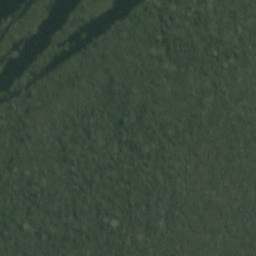

In [41]:
### Download test image

runtime = boto3.Session().client(service_name='runtime.sagemaker') 

file_name = 'test_pictures/train_10040.jpg'

# test image
from IPython.display import Image
Image(file_name)  

In [42]:
with open(file_name, 'rb') as f:
    payload = f.read()
    payload = bytearray(payload)

response = runtime.invoke_endpoint(
    EndpointName=endpoint_name, 
    ContentType='application/x-image', 
    Body=payload
)
result = json.loads(response['Body'].read())

# the result will output the probabilities for all classes
# find the class with maximum probability and print the class index
print(result)

index = np.argmax(result)
object_categories = ['0', '1']

print("Result: label - " + object_categories[index] + ", probability - " + str(result[index]))

[0.2283048927783966, 0.771695077419281]
Result: label - 1, probability - 0.771695077419281


In [ ]:
[0.0818532407283783, 0.9181467890739441]
Result: label - 1, probability - 0.9181467890739441

In [ ]:
# Delete endpoint
sage.delete_endpoint(EndpointName=endpoint_name)